In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from os.path import join


In [99]:
IMAGES_DIR = join('..', 'imgs')

INPUT_DIR_IMAGES = join(IMAGES_DIR, '07.Web')
OUTPUT_DIR = join(IMAGES_DIR, '07.Web')


In [459]:
blur_kernel_size = 81
canny_low_threshold = 100
canny_high_threshold = 3000
dilate_kernel = np.ones((3, 3), 'uint8')

image = cv2.imread(join(INPUT_DIR_IMAGES, 'MUMI-008-1.jpg'))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (blur_kernel_size, blur_kernel_size), 0)

edges = cv2.Canny(blur, canny_low_threshold, canny_high_threshold, apertureSize=7)
edges_dilate = cv2.dilate(edges, dilate_kernel, iterations=3)
edges_erode = cv2.erode(edges_dilate, dilate_kernel, iterations=2)

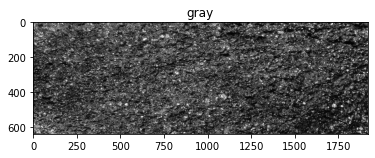

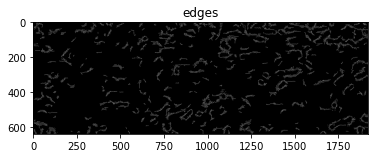

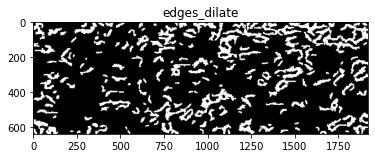

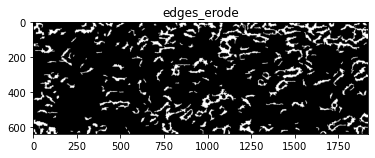

In [460]:
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.show()

plt.imshow(edges, cmap='gray')
plt.title('edges')
plt.show()

plt.imshow(edges_dilate, cmap='gray')
plt.title('edges_dilate')
plt.show()

plt.imshow(edges_erode, cmap='gray')
plt.title('edges_erode')
plt.show()


In [461]:
rho = 1
theta = np.pi / 90
threshold = 8
min_line_length = 32
max_line_gap = 16
line_image = np.copy(image) * 0


In [462]:
lines = cv2.HoughLinesP(edges_erode, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1), (x2,y2), (255,0,0), 1)

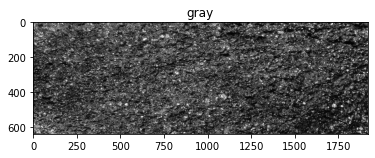

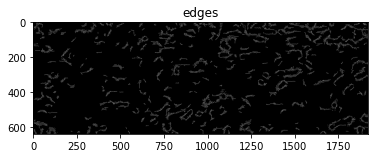

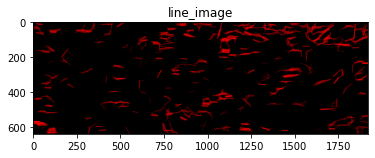

In [463]:
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.show()

plt.imshow(edges,cmap='gray')
plt.title('edges')
plt.show()

plt.imshow(line_image)
plt.title('line_image')
plt.show()
